# Investment

## Stochastic



![picture 1](images/8f13fb47af9892c491ef93aec041115b5440af01fd6c246dd2ff241101be8682.png)  

![picture 2](images/6ce78111cebba7a346007d3d3d1f2ff80859f85f8d9e60c008b0e55abfe2ee31.png)  


Slow K : 스토캐스틱 전략은 들쭉 날쭉이 심하다. 이를 유연화 하기 위해서 이동평균을 사용한다. 
- 스토캐스틱의 이동 평균 값

Sow D : Slow K 를 한번더 유연화 하기 위해서 Slow K 를 다시 한번 이동편균 한 값


### 전략 1 : 평균 회귀

Slow K is under the 20 -> 과매도 구간 : 저렴 - 매수

Slow k is over than 80 -> 과매수 구간 : 비쌈 - 매도

### 전략 2 : 모멘텀 투자

Slow K - Slow D > 0 : 상승 추세 - 매수

Slow K - Slow D < 0 : 하락 추세 - 매도



In [1]:
import os, sys
import pandas as pd
import numpy as np
from datetime import datetime
import finterstellar as fs
import json
sys.path.append('method.py')


from method import *

start : 2020-01-01 00:00:00,end: 2021-01-01 00:00:00
yahoo finance df's columns : Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
                     Open  High   Low  Close   Volume  Dividends  Stock Splits
Date                                                                          
2020-01-02 05:00:00 58.53 58.98 58.05  58.63  4459200       0.00          0.00
2020-01-03 05:00:00 57.11 57.72 56.52  57.66  9078100       0.00          0.00
2020-01-06 05:00:00 56.60 57.36 56.27  57.26  5504300       0.00          0.00
2020-01-07 05:00:00 57.51 57.67 57.08  57.21  5563000       0.00          0.00
2020-01-08 05:00:00 57.35 58.99 57.33  58.45  8519000       0.00          0.00
             DAL
2020-01-02 59.04
2020-01-03 58.06
2020-01-06 57.66
2020-01-07 57.61
2020-01-08 58.85
                     Open  High   Low  Close    Volume  Dividends  \
Date                                                                
2020-12-24 05:00:00 40.42 40.4

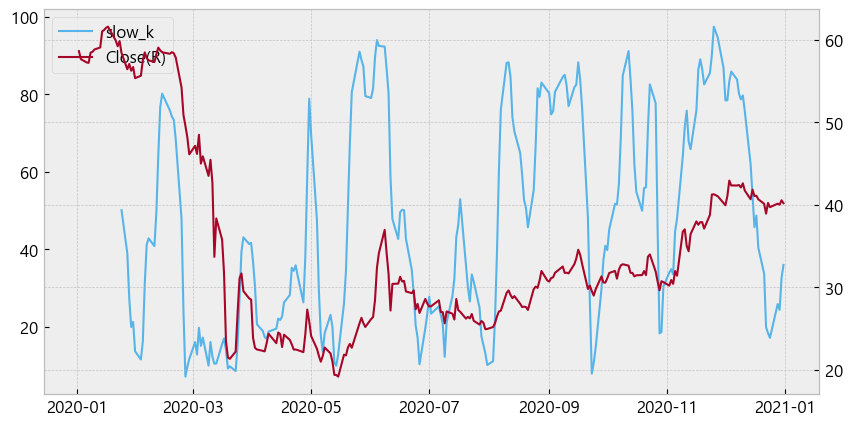

In [6]:
dal = get_yf_df('DAL',datetime(2020, 1,1), datetime(2021,1,1))


t = fs.get_price('DAL', start_date='2020-01-01', end_date = '2020-12-31')
print(dal.head())
print(t.head())

print(dal.tail())
print(t.tail())
dal_stochastic = get_stochastic(dal)


draw_chart(dal_stochastic, left='slow_k', right="Close")


signal columns : Index(['Close', 'slow_k', 'slow_d', 'trade', 'position', 'position_chart'], dtype='object')
CAGR: -29.58%
Accumulated return: -27.31%
Average return: -1.64%
Benchmark return : -28.95%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: -0.36
MDD: -61.71%
Benchmark MDD: -68.85%






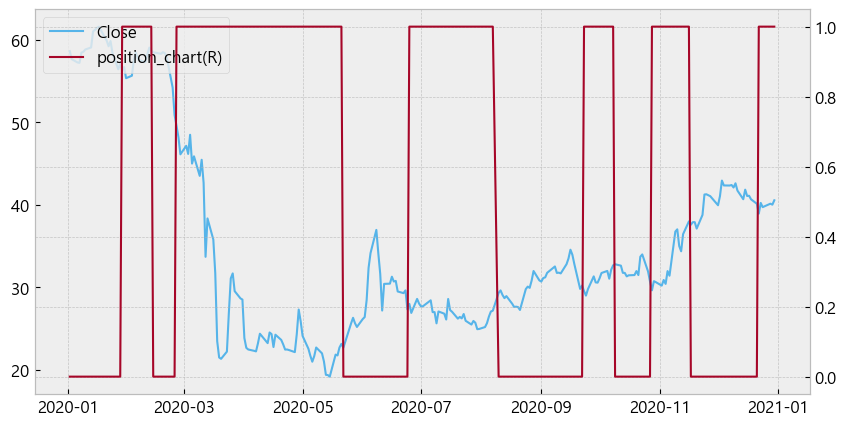

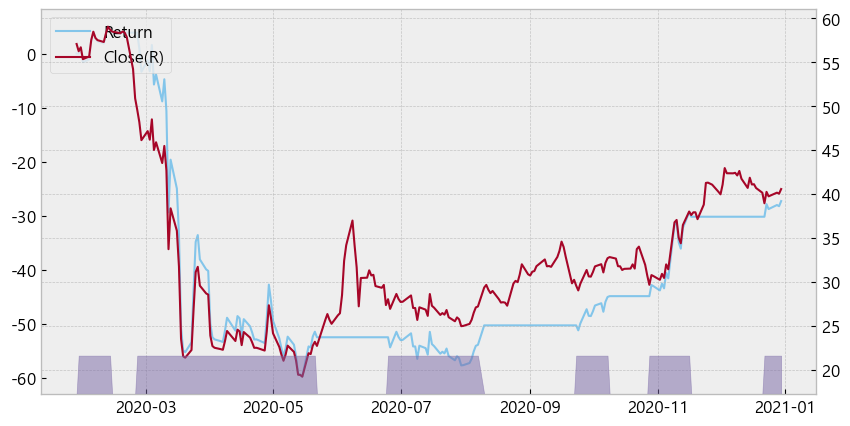

In [10]:
add_signal_df(dal_stochastic, 'slow_k', 20, 80)

draw_chart(dal_stochastic, left = 'Close', right ='position_chart')

dal_stochastic_eval, result = get_evaluate_column(dal_stochastic)

draw_trade_results(dal_stochastic_eval)


signal columns : Index(['Close', 'slow_k', 'slow_d', 'indi', 'trade', 'position',
       'position_chart'],
      dtype='object')
CAGR: -2.06%
Accumulated return: -1.90%
Average return: 0.69%
Benchmark return : -28.95%
Number of trades: 29
Number of win: 11
Hit ratio: 37.93%
Investment period: 0.9yrs
Sharpe ratio: -0.04
MDD: -53.57%
Benchmark MDD: -68.85%






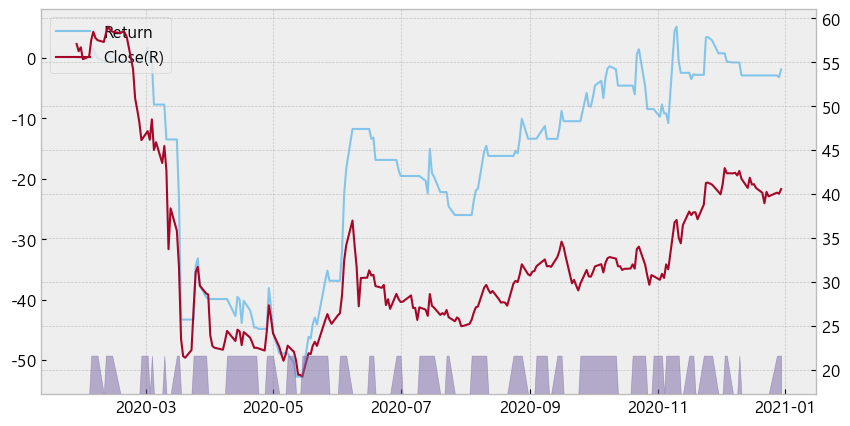

In [11]:
change_sto = get_stochastic(dal)
change_sto['indi'] = change_sto['slow_k'] - change_sto['slow_d']
add_signal_df(change_sto, 'indi', 0, 0)

add_position_df(change_sto)
sto_eval, result= get_evaluate_column(change_sto)
draw_trade_results(sto_eval)